# Organizational_Health_Analysis
---
#### YFW

In [8]:
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import datetime
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
# Assign spreadsheet filename to `file`
file = '/Users/wangevan/Google Drive/GitHub_Open/Org_Health_Analysis/HR_Dataset_email.xlsx'
# Load spreadsheet
xl = pd.ExcelFile(file)
print(xl.sheet_names)
df1 = xl.parse('ParticipantInfo')
df2 = xl.parse('Daily E-mail')

['ParticipantInfo', 'Daily E-mail']


### I. Data Stat
---

In [9]:
print(df1.dtypes, df1.describe())
print(df2.dtypes, df2.describe())

UserID       int64
Team        object
Location    object
Manager?    object
dtype: object               UserID
count      38.000000
mean   236648.447368
std     70257.710228
min     53534.000000
25%    176763.000000
50%    260585.500000
75%    291084.250000
max    323238.000000
Date             datetime64[ns]
Sender                    int64
Receiver                  int64
Receiver type            object
Count                     int64
dtype: object               Sender       Receiver        Count
count    1500.000000    1500.000000  1500.000000
mean   239431.654000  236143.796667    11.199333
std     68074.408901   67966.783802     8.635584
min     53534.000000   53534.000000     1.000000
25%    182838.000000  174738.000000     5.000000
50%    260833.000000  260338.000000     9.000000
75%    292634.000000  292633.000000    14.000000
max    323238.000000  323238.000000    44.000000


### Q1:  Boston team with higher cohesion and higher manager visibiity 
---
- Q1.1:  Verify the hypothesis 
- Q1.2:  How to improving engagment in the PA office
- Q1.3:  Any limition in this analysis 

### II. Hypothesis Verification - Boston has higher cohesion & higher manager visibility 
---
 
- Cohesion definition - how well connected teammates are
- Visibility definition - teams spend more time with their manager

 - **Findings**
    - The following result shows Boston team is closer with their teammates and tend to have higher tendency for cluster (avg_distance = 1.33; cluster coef = 0.76) other than the CA team (avg_distance = 1.58; cluster coef = 0.72). Also, the results of transitivity proves the Boston team has more collaborate than CA team.

Name: 
Type: Graph
Number of nodes: 38
Number of edges: 615
Average degree:  32.3684
Density 0.8748221906116643
Avg distance between every pair 1.1251778093883358
Global Clustering Coefficient 0.8732418789150426
Transitivity 0.8729781406645651


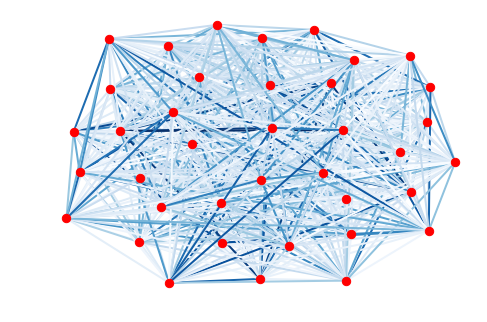

In [12]:
import pandas as pd
import networkx as nx
#nx.from_pandas_edgelist(x, 1, 2, edge_attr=True)
dt = df2.merge(df1,how="left",left_on="Sender",right_on = "UserID")
People_dt = dt.iloc[:,[1,2,4,7,8]]
People_dt_MA = People_dt[People_dt['Location']=='Boston']
People_dt_CA = People_dt[People_dt['Location']=='Palo Alto']
#


### Overall
g = nx.from_pandas_edgelist(People_dt, source='Sender', target='Receiver',edge_attr='Count') 
print(nx.info(g))
# set up edge, weights
edges,weights = zip(*nx.get_edge_attributes(g,'Count').items())

nx.draw(g, node_color='red', node_size=70, edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues)
### 
print('Density',nx.density(g))
print('Avg distance between every pair',nx.average_shortest_path_length(g))
print('Global Clustering Coefficient',nx.average_clustering(g))
print('Transitivity',nx.transitivity(g))

# Cohesion of Boston team 
g_MA = nx.from_pandas_edgelist(People_dt_MA, source='Sender', target='Receiver') 
#nx.draw(g_MA)
# Cohesion of CA team
g_CA = nx.from_pandas_edgelist(People_dt_CA, source='Sender', target='Receiver') 
#nx.draw(g_CA)

Name: 
Type: Graph
Number of nodes: 38
Number of edges: 465
Average degree:  24.4737
Density 0.6614509246088194
Boston - Avg distance between every pair 1.3385490753911806
Boston - Global Clustering Coefficient 0.7631558753594085
Boston - Transitivity 0.7212684989429176


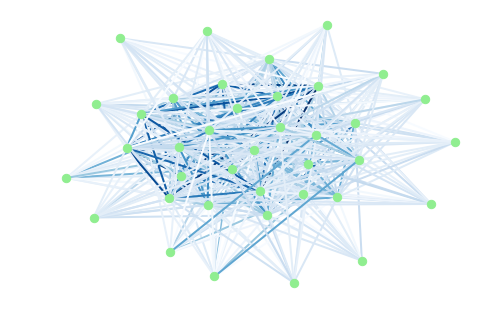

In [13]:
# Cohesion of Boston team 
g_MA = nx.from_pandas_edgelist(People_dt_MA, source='Sender', target='Receiver',edge_attr='Count') 
# set up edge, weights
edges_MA,weights_MA = zip(*nx.get_edge_attributes(g_MA,'Count').items())

nx.draw(g_MA, node_color='lightgreen', node_size=70, edgelist=edges_MA, edge_color=weights_MA, width=2.0, edge_cmap=plt.cm.Blues)
print(nx.info(g_MA))
print('Density',nx.density(g_MA))
print('Boston - Avg distance between every pair',nx.average_shortest_path_length(g_MA))
print('Boston - Global Clustering Coefficient',nx.average_clustering(g_MA))
print('Boston - Transitivity',nx.transitivity(g_MA))

Name: 
Type: Graph
Number of nodes: 38
Number of edges: 293
Average degree:  15.4211
Density 0.4167852062588905
Palo Alto - Avg distance between every pair 1.5846372688477952
Palo Alto - Global Clustering Coefficient 0.7196968440521664
Palo Alto - Transitivity 0.5241282141599155


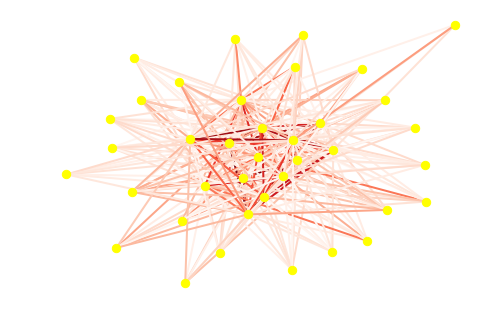

In [14]:
# Cohesion of CA team
g_CA = nx.from_pandas_edgelist(People_dt_CA, source='Sender', target='Receiver',edge_attr='Count') 
# set up edge, weights
edges_CA,weights_CA = zip(*nx.get_edge_attributes(g_CA,'Count').items())
nx.draw(g_CA, node_color='yellow', node_size=70, edgelist=edges_CA, edge_color=weights_CA, width=2.0, edge_cmap=plt.cm.Reds)
print(nx.info(g_CA))
print('Density',nx.density(g_CA))
print('Palo Alto - Avg distance between every pair',nx.average_shortest_path_length(g_CA))
print('Palo Alto - Global Clustering Coefficient',nx.average_clustering(g_CA))
print('Palo Alto - Transitivity',nx.transitivity(g_CA))

## III. Visibility Examination 

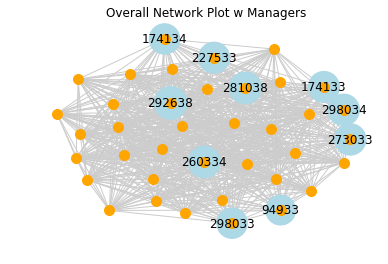

In [15]:
# Highlight mgr within the network
# Manager list 
mgr_list = df1[df1['Manager?']=="Y"].UserID.unique() 
# Labels dict
labels = {}    
for node in g.nodes():
    if node in mgr_list:
        #set the node name as the key and the label as its value 
        labels[node] = node

# Plot
pos=nx.spring_layout(g)
mgr_size = [g.degree(key) * 30 for key in labels]
nx.draw_networkx_nodes(g, 
                       pos, 
                       nodelist=labels, 
                       node_size=mgr_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

nx.draw_networkx_nodes(g, pos, node_color='orange', node_size=100)
nx.draw_networkx_labels(g, pos, labels=labels)
nx.draw_networkx_edges(g, pos, width=1, edge_color="#cccccc")

plt.axis('off')
plt.title("Overall Network Plot w Managers")
plt.show()

#ref - http://jonathansoma.com/lede/algorithms-2017/classes/networks/networkx-graphs-from-source-target-dataframe/



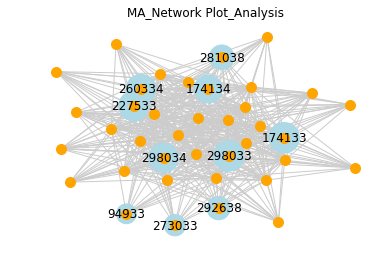

In [16]:
# MA_Plot
# Plot
pos=nx.spring_layout(g_MA)
mgr_size = [g_MA.degree(key) * 30 for key in labels]
nx.draw_networkx_nodes(g_MA, 
                       pos, 
                       nodelist=labels, 
                       node_size=mgr_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

nx.draw_networkx_nodes(g_MA, pos, node_color='orange', node_size=100)
nx.draw_networkx_labels(g_MA, pos, labels=labels)
nx.draw_networkx_edges(g_MA, pos, width=1, edge_color="#cccccc")

plt.axis('off')
plt.title("MA_Network Plot_Analysis")
plt.show()

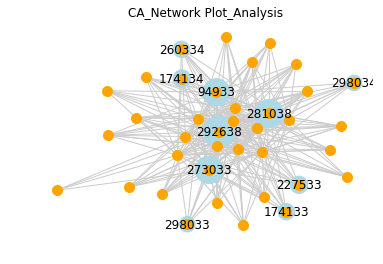

In [17]:
# CA_Plot

# Plot
pos=nx.spring_layout(g_CA)
mgr_size = [g_CA.degree(key) * 30 for key in labels]
nx.draw_networkx_nodes(g_CA, 
                       pos, 
                       nodelist=labels, 
                       node_size=mgr_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

nx.draw_networkx_nodes(g_CA, pos, node_color='orange', node_size=100)
nx.draw_networkx_labels(g_CA, pos, labels=labels)
nx.draw_networkx_edges(g_CA, pos, width=1, edge_color="#cccccc")

plt.axis('off')
plt.title("CA_Network Plot_Analysis")
plt.show()


In [18]:
People_dt = dt.iloc[:,[1,2,4,6,7]]
People_dt_CA_ana = People_dt[(People_dt['Location']=='Palo Alto') & (People_dt['Team'] == "Analytics")]
People_dt_CA_bus = People_dt[(People_dt['Location']=='Palo Alto') & (People_dt['Team'] == "Business")]
People_dt_CA_DC = People_dt[(People_dt['Location']=='Palo Alto') & (People_dt['Team'] == "Tech DC")]
People_dt_CA_HYPE = People_dt[(People_dt['Location']=='Palo Alto') & (People_dt['Team'] == "Tech HYPE")]
People_dt_MA_ana = People_dt[(People_dt['Location']=='Boston') & (People_dt['Team'] == "Analytics")]
People_dt_MA_bus = People_dt[(People_dt['Location']=='Boston') & (People_dt['Team'] == "Business")]
People_dt_MA_DC = People_dt[(People_dt['Location']=='Boston') & (People_dt['Team'] == "Tech DC")]
People_dt_MA_HYPE = People_dt[(People_dt['Location']=='Boston') & (People_dt['Team'] == "Tech HYPE")]

In [19]:
def mean_degree_centrality_non_Mgr( filename ):
    if len(filename) == 0 : 
        return("NA, There is 0 teammember under this condition. ")
    else:
        g_tem = nx.from_pandas_edgelist(filename, source='Sender', target='Receiver',edge_attr='Count')
        list_tem = nx.degree_centrality(g_tem)
        result_tem = {key: value for key, value in list_tem.items() if key in mgr_list}  
        return(np.mean(list(result_tem.values())))


In [21]:
print(" * Boston Team Info * ")
print("Degree of Centrality of Boston's Analytics team",mean_degree_centrality_non_Mgr(People_dt_MA_ana))
print("Degree of Centrality of Boston's Business team",mean_degree_centrality_non_Mgr(People_dt_MA_bus))
print("Degree of Centrality of Boston's DC team",mean_degree_centrality_non_Mgr(People_dt_MA_DC))
print("Degree of Centrality of Boston's HYPE team",mean_degree_centrality_non_Mgr(People_dt_MA_HYPE))
print(" ")
print(" * Palo Alto Team Info * ")
print("Degree of Centrality of Palo Alto's Analytics team",mean_degree_centrality_non_Mgr(People_dt_CA_ana))
print("Degree of Centrality of Palo Alto's Business team",mean_degree_centrality_non_Mgr(People_dt_CA_bus))
print("Degree of Centrality of Palo Alto's DC team",mean_degree_centrality_non_Mgr(People_dt_CA_DC))
print("Degree of Centrality of Palo Alto's HYPE team",mean_degree_centrality_non_Mgr(People_dt_CA_HYPE))
print(" ")
print(" * Summarized Info * ")
print(" Avg degree of centrality comparison:", "MA's DOC =  ",0.263," & ","CA's DOC = ",0.233)

 * Boston Team Info * 
Degree of Centrality of Boston's Analytics team NA, There is 0 teammember under this condition. 
Degree of Centrality of Boston's Business team 0.1945945945945946
Degree of Centrality of Boston's DC team 0.2918918918918919
Degree of Centrality of Boston's HYPE team 0.3027027027027027
 
 * Palo Alto Team Info * 
Degree of Centrality of Palo Alto's Analytics team 0.34594594594594597
Degree of Centrality of Palo Alto's Business team 0.12162162162162163
Degree of Centrality of Palo Alto's DC team NA, There is 0 teammember under this condition. 
Degree of Centrality of Palo Alto's HYPE team NA, There is 0 teammember under this condition. 
 
 * Summarized Info * 
 Avg degree of centrality comparison: MA's DOC =   0.263  &  CA's DOC =  0.233


### ** Findings **
---
- To examine the degrees of centrality between managers in two teams, we assume managers have many connections. By the result, we find that Boston managers' degree of centrality is 13% higher than the Palo Alto's, implying that Boston’s team managers are more connected with their team.
- Meanwhile, the below result also shows a difference of 30 emails in average between the managers from CA and managers from MA - CA team managers have less email communication than MA team managers
--- 

In [22]:
dt = df2.merge(df1,how="left",left_on="Sender",right_on = "UserID")
dt2 = dt.merge(df1,how="left",left_on="Receiver",right_on = "UserID")
mgr_df = dt2.iloc[:,[1,2,4,6,7,8,9,10,11,12]]; #mgr_df.head()
mgr_df_y = mgr_df[mgr_df['Manager?_x']=="Y"];#mgr_df_y.head()
mgr_df_y['Team - Team'] = mgr_df_y['Team_x'] +'-'+  mgr_df_y['Team_y']
mgr_df_y['Loc - Loc'] = mgr_df_y['Location_x'] +'-'+  mgr_df_y['Location_y']
#mgr_df_y.groupby(['Loc - Loc','Team - Team'])['Count'].sum() # tot emails being sent by manager
#mgr_df_y.groupby(['Loc - Loc','Team - Team'])['Receiver'].count() # tot contacts from the same team being contacted by manager
#mgr_df_y.groupby(['Loc - Loc','Team - Team'])['Sender'].nunique() # tot managers
print(" * Summarized Info * ")
print("Boston manager's avg email sent to their team - ", (123 + 237 + 239.5)/3)
print("Palo Alto manager's avg email sent to their team - ", (260 + 79.0)/2)
print(" * Overall Info * ")
print(pd.DataFrame(mgr_df_y.groupby(['Loc - Loc','Team - Team'])['Count'].sum() / mgr_df_y.groupby(['Loc - Loc','Team - Team'])['Sender'].nunique()))


 * Summarized Info * 
Boston manager's avg email sent to their team -  199.83333333333334
Palo Alto manager's avg email sent to their team -  169.5
 * Overall Info * 
                                                  0
Loc - Loc           Team - Team                    
Boston-Boston       Business-Business    123.000000
                    Business-Tech DC      52.000000
                    Business-Tech HYPE    66.000000
                    Tech DC-Business     118.500000
                    Tech DC-Tech DC      237.000000
                    Tech DC-Tech HYPE    118.000000
                    Tech HYPE-Business    79.500000
                    Tech HYPE-Tech DC    126.500000
                    Tech HYPE-Tech HYPE  239.500000
Boston-Palo Alto    Business-Analytics    91.000000
                    Business-Business     39.000000
                    Tech DC-Analytics     46.000000
                    Tech DC-Business      10.000000
                    Tech HYPE-Analytics   90.000000
 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 2. What's the recommendation by the 1st hypothesis result
---


- **Summarized Info**

    - The following result shows Boston team is closer with their teammates and tend to have higher tendency for cluster (avg_distance = 1.33; cluster coef = 0.76) other than the CA team (avg_distance = 1.58; cluster coef = 0.72). Also, the results of transitivity proves the Boston team has more collaborate than CA team.
    - To examine the degrees of centrality between managers in two teams, we assume managers have many connections. By the result, we find that Boston managers' degree of centrality is 13% higher than the Palo Alto's, implying that Boston’s team managers are more connected with their team.
    - Meanwhile, the below result also shows a difference of 30 emails in average between the managers from CA and managers from MA - CA team managers have less email communication than MA team managers
    
- **Recommendation**
    - There are several ways to improve the engagement of CA team; for example, leadership training, coaching, and cross-functional projects. Before the initiation, it is also important for CA team members to understand each other’s roles and responsibilities. Take my experience at Southwest Airlines for instance, Southwest had weekly happy hours opening to all functional teams. At the time, they will announce the important milestone of marketing team, staff of week, birthday,...etc. This provides a great opportunity for employees to connect with people from other teams and to increase interactions among teams.
    - Additionally, good on-boarding experience is also vital for new comers to fit into the team or the company in a short period.
 

####  3. Any limitation from this analysis?

1. Communication time does not equal to total counts of emails. Therefore, we cannot say email communication can completely represent the overall communication
2. Further analyses is needed to examine the relationship between team performance and the engagement level

####  4.1 Do persons email others at their own site more often then they email people at other site? How much more or less?

- #emails at their own site = 12737(8837 + 3900)
- #emails at other site = 4062(2125 + 1937)
- The emails people send to their own site is much higher then the other side by 8675 emails

In [23]:
dt = df2.merge(df1,how="left",left_on="Sender",right_on = "UserID")
dt2 = dt.merge(df1,how="left",left_on="Receiver",right_on = "UserID")
site = dt2.iloc[:,[1,2,4,6,7,10,11,12]]

site.groupby(['Location_x','Location_y'])['Count'].sum()
#site.groupby(['Location_x','Location_y']).agg('Count').describe()

Location_x  Location_y
Boston      Boston        8837
            Palo Alto     2125
Palo Alto   Boston        1937
            Palo Alto     3900
Name: Count, dtype: int64

#### 4.2 Which team communicate the most?
#### 4.3 Which team communicate the least?

- California's Business team sent least emails in total during the period
- Boston's Tech HYPE team & Palo Alto's Analytics team sent the most emails during the period

In [24]:
print(site.groupby(['Location_x','Team_x'])['Count'].sum())
site['Loc - Team_Sen'] = site['Location_x'] +'-'+  site['Team_x']
site['Loc - Team_Rec'] = site['Location_y'] +'-'+  site['Team_y']

print(site.groupby(['Loc - Team_Sen','Loc - Team_Rec'])['Count'].sum())

Location_x  Team_x   
Boston      Business     2308
            Tech DC      4293
            Tech HYPE    4361
Palo Alto   Analytics    4366
            Business     1471
Name: Count, dtype: int64
Loc - Team_Sen       Loc - Team_Rec     
Boston-Business      Boston-Business         561
                     Boston-Tech DC          518
                     Boston-Tech HYPE        462
                     Palo Alto-Analytics     476
                     Palo Alto-Business      291
Boston-Tech DC       Boston-Business         731
                     Boston-Tech DC         2253
                     Boston-Tech HYPE        831
                     Palo Alto-Analytics     343
                     Palo Alto-Business      135
Boston-Tech HYPE     Boston-Business         630
                     Boston-Tech DC          959
                     Boston-Tech HYPE       1892
                     Palo Alto-Analytics     740
                     Palo Alto-Business      140
Palo Alto-Analytics  Bosto

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
print(pd.DataFrame(site.groupby(['Loc - Team_Sen','Loc - Team_Rec'])['Count'].sum()))

                                         Count
Loc - Team_Sen      Loc - Team_Rec            
Boston-Business     Boston-Business        561
                    Boston-Tech DC         518
                    Boston-Tech HYPE       462
                    Palo Alto-Analytics    476
                    Palo Alto-Business     291
Boston-Tech DC      Boston-Business        731
                    Boston-Tech DC        2253
                    Boston-Tech HYPE       831
                    Palo Alto-Analytics    343
                    Palo Alto-Business     135
Boston-Tech HYPE    Boston-Business        630
                    Boston-Tech DC         959
                    Boston-Tech HYPE      1892
                    Palo Alto-Analytics    740
                    Palo Alto-Business     140
Palo Alto-Analytics Boston-Business        206
                    Boston-Tech DC         378
                    Boston-Tech HYPE       777
                    Palo Alto-Analytics   2662
             

#### 4.4 Visualization 

Please find the plots from another html file. 

####  Reference

In [ ]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

 **Definition**
 - nx.average_shortest_path_length(G) - Average distance between every pair of nodes
 - Clustering coefficient measures the degree to which nodes in a network tend to “cluster” or form triangles.
 - Global Clustering Coefficient - Measuring clustering on the whole network, Average local clustering coefficient
    over all nodes in the graph.
 - Transitivity: Ratio of number of triangles and number of “open triads” in a network
 